In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../datasets/variados/wine_ap1.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,NaN,NaN,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         169 non-null float64
malic_acid                      167 non-null float64
ash                             172 non-null float64
alcalinity_of_ash               169 non-null float64
magnesium                       165 non-null float64
total_phenols                   169 non-null float64
flavanoids                      165 non-null float64
nonflavanoid_phenols            165 non-null float64
proanthocyanins                 167 non-null float64
color_intensity                 171 non-null float64
hue                             165 non-null float64
od280/od315_of_diluted_wines    172 non-null float64
proline                         170 non-null float64
y                               178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


Percebemos que existem valores faltantes.

In [4]:
np.mean(df['alcohol']) # visualizando a média do atributo

13.038875739644961

In [5]:
df.where(pd.notna(df), df.mean(), axis='columns', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
y                               178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [7]:
np.mean(df['alcohol']) #visualizando a média do atributo após aplica a média para todos.
# a média foi aplicada corretamente

13.038875739644965

In [8]:
df.corr().style.background_gradient('viridis')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
alcohol,1,0.0594934,0.208462,-0.306152,0.255015,0.237898,0.203969,-0.121112,0.129333,0.507365,-0.0342858,0.0430742,0.610935,-0.330125
malic_acid,0.0594934,1,0.162386,0.297836,-0.032299,-0.339057,-0.404339,0.280054,-0.150431,0.23321,-0.535255,-0.352133,-0.178505,0.421389
ash,0.208462,0.162386,1,0.427367,0.31843,0.132523,0.103212,0.185332,0.0482807,0.256548,-0.0520827,-0.00162364,0.200662,-0.031597
alcalinity_of_ash,-0.306152,0.297836,0.427367,1,-0.0120046,-0.337162,-0.369196,0.335112,-0.186523,0.0424995,-0.267803,-0.265202,-0.428316,0.506512
magnesium,0.255015,-0.032299,0.31843,-0.0120046,1,0.191217,0.182841,-0.221938,0.196932,0.224927,0.0346951,0.0598903,0.368006,-0.187103
total_phenols,0.237898,-0.339057,0.132523,-0.337162,0.191217,1,0.853074,-0.414599,0.564016,-0.0869604,0.41755,0.679858,0.453689,-0.708629
flavanoids,0.203969,-0.404339,0.103212,-0.369196,0.182841,0.853074,1,-0.529761,0.562338,-0.193517,0.518127,0.749447,0.447987,-0.816759
nonflavanoid_phenols,-0.121112,0.280054,0.185332,0.335112,-0.221938,-0.414599,-0.529761,1,-0.343529,0.173011,-0.223495,-0.455189,-0.298782,0.472091
proanthocyanins,0.129333,-0.150431,0.0482807,-0.186523,0.196932,0.564016,0.562338,-0.343529,1,-0.0138266,0.254052,0.478035,0.336211,-0.464638
color_intensity,0.507365,0.23321,0.256548,0.0424995,0.224927,-0.0869604,-0.193517,0.173011,-0.0138266,1,-0.491963,-0.43652,0.273072,0.277354


Os atributos que possuem maior correlação positiva sem contar com a correlação entre os mesmos atributos são: total_phenols & flavanoids.

Quando existe uma correlação muito alta entre features, significa que não precisamos de todos, basta apenas um para representá-los e para criarmos o modelo, pois os valores de um atributo já irá implicar no valor de outro, enão não há necessidade de ter os dois. Obviamente se uma feature possuir alta correlação com uma label, significa que essa feature é importante para o algoritmo, portanto não pode ser removido.

Os atributos que possuem o maior valor negativo de correlação são: Flavanoids & y

Quando a correlação está muito perto de -1, significa que a correlação entre os atributos é minima, praticamente nenhum dado implica em vum valor igual/próximo a outro. 

In [9]:
from sklearn.preprocessing import StandardScaler

separando as labels das features

In [10]:
X, y = df.values[:, :-1], df.values[:, -1]

In [11]:
from matplotlib import pyplot as plt

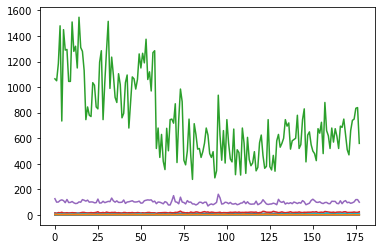

In [12]:
plt.plot(X);

Valores muito diferentes

In [13]:
trans = StandardScaler()
X_trans = trans.fit_transform(X)

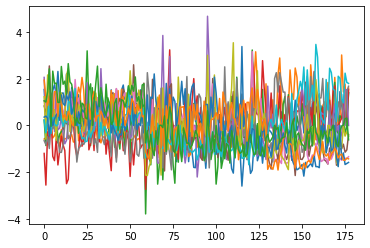

In [14]:
plt.plot(X_trans); # Exemplo da primeira coluna não Estandartizada

Com esses lindos gráficos é possivel perceber que com a standartização, os valores ele foram transfomados e todos ficaram pertencendo a uma mesma escala e esta transformação não prejudica a apredizagem do algoritmo. como podemos observar a seguir:

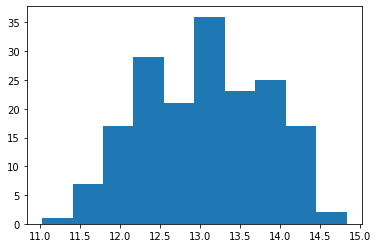

In [15]:
plt.hist(X[:, 0]);

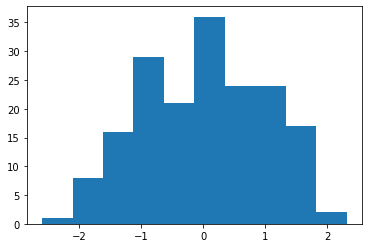

In [16]:
plt.hist(X_trans[:, 0]);

percebemos que mesmo com os valores alterados o atributo não perdeu sua essencia. Comparando os graficos que estão bem parecidos

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=42)
X_trans_train, X_trans_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.75, stratify=y, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### DecisionTreeClassifier & NearestNeighbours

In [20]:
models = {}
models['DTC'] = {'model': DecisionTreeClassifier(), 'model_trans': DecisionTreeClassifier(), 'pred_test':[], 'pred_trans_test':[], 'pred_train':[], 'pred_trans_train':[], 'acc_test':0, 'acc_train':0, 'acc_trans_test':0, 'acc_trans_train':0}
models['KNN'] = {'model': KNeighborsClassifier(),   'model_trans': KNeighborsClassifier(),   'pred_test':[], 'pred_trans_test':[], 'pred_train':[], 'pred_trans_train':[], 'acc_test':0, 'acc_train':0, 'acc_trans_test':0, 'acc_trans_train':0}

In [21]:
# Definindo método da acurácia: (TP + TN)/TOTAL 
# from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as cf
def acc(y_pred, y_true):
    return np.sum(np.diagonal(cf(y_pred, y_true)))/np.sum(cf(y_pred, y_true))

In [22]:
for key in models:
    models[key]['model'].fit(X_train, y_train)
    models[key]['model_trans'].fit(X_trans_train, y_train)
    models[key]['pred_train'] = models[key]['model'].predict(X_train)
    models[key]['pred_test']  = models[key]['model'].predict(X_test)
    models[key]['pred_trans_train'] = models[key]['model_trans'].predict(X_trans_train)
    models[key]['pred_trans_test'] = models[key]['model_trans'].predict(X_trans_test)
    models[key]['acc_train']  = acc(models[key]['pred_train'], y_train)
    models[key]['acc_test']  = acc(models[key]['pred_test'], y_test)
    models[key]['acc_trans_train']  = acc(models[key]['pred_trans_train'], y_train)
    models[key]['acc_trans_test']  = acc(models[key]['pred_trans_test'], y_test)

In [23]:
for key in models:
    print(models[key]['model'])
    print('acc_train: ' + str(models[key]['acc_train']))
    print('acc_test: ' +  str(models[key]['acc_test']))
    print('acc_trans_train: ' + str(models[key]['acc_trans_train']))
    print('acc_trans_test: ' + str(models[key]['acc_trans_test']))
    print('\n\n')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
acc_train: 1.0
acc_test: 0.8888888888888888
acc_trans_train: 1.0
acc_trans_test: 0.8888888888888888



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
acc_train: 0.7819548872180451
acc_test: 0.6444444444444445
acc_trans_train: 0.9699248120300752
acc_trans_test: 0.9333333333333333





O Algoritmo que apresentou pior acurácia foi o KNeigborsClassifiers quando foi predizer os dados de treino não standartizados.

Já o melhor foi o DecisionTreeClassifier quando foi predizer os dados de treino tanto estandartizados como não estandartizados.

Ocorreu overfitting nos resultados sim pois em cada um dos algoritmos ele apresentou uma acurácia melhor para o dataset de treino do que para o dataset de teste

### K-means e método do cotovelo

In [24]:
from sklearn.cluster import KMeans

In [25]:
inertias = []
for k in range(1, 10, 2):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

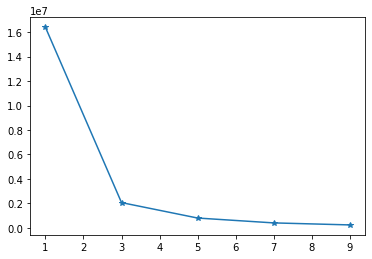

In [26]:
plt.plot(range(1, 10, 2), inertias, marker='*');

A técinica acima é chamada de cotovelo, podemos perceber que a partir do k=3, o modelo permanence com a inercia similar, ou seja, significa que os centroids não mudam muito de poisição, portanto, é considerado que este pode ser a melhor configuração de número de clusters